In [9]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split


In [11]:
dataset = pd.read_csv('Amazon_Stock_Price.csv')  

open_prices = dataset.iloc[:, 2:3].values  

train_size = int(len(open_prices) * 0.8)  

train_data = open_prices[:train_size]  
test_data = open_prices[train_size:]   

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_scaled = sc.fit_transform(train_data)  

x_train = []
y_train = []

In [13]:
for i in range(60, train_size):
    x_train.append(training_scaled[i-60:i, 0])  
    y_train.append(training_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

regressor = Sequential()


regressor.add(SimpleRNN(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))  

regressor.add(SimpleRNN(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


regressor.summary()


regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(x_train, y_train, epochs=100, batch_size=32)

c:\Users\Rami Alrwais\Desktop\training\jupyter\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 60, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0905
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0193
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0102
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0065
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0054
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0047
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0035
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0031
Epoch 9/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0025
Epoch 10/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0023
Epoch 11/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0020
Epoch 12/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0022
Epoch 13/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0016
Epoch 14/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0016
Epoch 15/100
150/150 ━━━━━━━

In [15]:
dataset_total = np.concatenate((train_data, test_data), axis=0)  

inputs = dataset_total[len(dataset_total) - len(test_data) - 60:]

inputs = inputs.reshape(-1, 1)

inputs = sc.transform(inputs)

x_test = []
for i in range(60, 60 + len(test_data)):
    x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_price = regressor.predict(x_test)

predicted_price = sc.inverse_transform(predicted_price)

real_stock_price = test_data

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


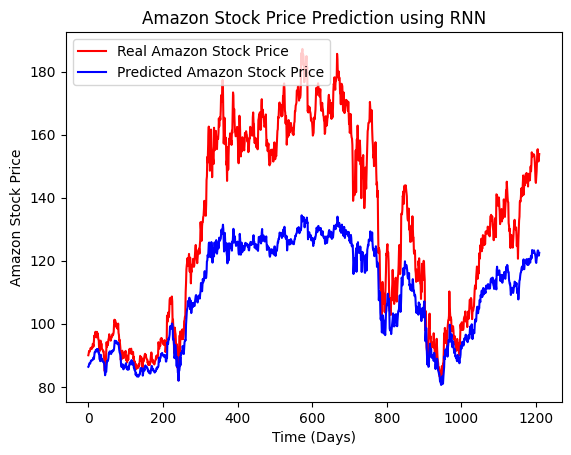

In [16]:
plt.plot(real_stock_price, color='red', label='Real Amazon Stock Price')
plt.plot(predicted_price, color='blue', label='Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction using RNN')
plt.xlabel('Time (Days)')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()